In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys, os

#sys.path.append(os.path.abspath(os.path.join("../..")))
sys.path.append(os.path.abspath(os.path.join("../scripts")))

In [3]:
import explore
import plot
# import clean
# cleaned = clean.clean()

# Import the data

In [4]:
data_url = explore.get_data_url("data/clean_merged.csv", "v1.1")
merged_completed = pd.read_csv(data_url)

merged_completed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717114 entries, 0 to 717113
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_id           717114 non-null  int64  
 1   trip_start_time    717114 non-null  object 
 2   trip_end_time      717114 non-null  object 
 3   origin_lat         717114 non-null  float64
 4   origin_lng         717114 non-null  float64
 5   destination_lat    717114 non-null  float64
 6   destination_lng    717114 non-null  float64
 7   trip_duration      717114 non-null  object 
 8   trip_duration_hrs  717114 non-null  float64
 9   trip_distance_km   717114 non-null  float64
 10  driver_id          717114 non-null  int64  
 11  driver_action      717114 non-null  object 
 12  driver_lat         717114 non-null  float64
 13  driver_lng         717114 non-null  float64
 14  fulfilled          717114 non-null  int64  
 15  driver-origin_km   717114 non-null  float64
 16  dr

In [5]:
data_url = explore.get_data_url("data/incomplete_merged.csv", "v1.1")
merged_incomplete = pd.read_csv(data_url)

merged_incomplete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          984 non-null    int64  
 1   origin_lat        984 non-null    float64
 2   origin_long       984 non-null    float64
 3   destination_lat   984 non-null    float64
 4   destination_long  984 non-null    float64
 5   trip_distance_km  984 non-null    float64
 6   driver_id         984 non-null    int64  
 7   driver_action     984 non-null    object 
 8   driver_lat        984 non-null    float64
 9   driver_lng        984 non-null    float64
 10  fulfilled         984 non-null    int64  
 11  driver-origin_km  984 non-null    float64
 12  driver-dest_km    984 non-null    float64
dtypes: float64(9), int64(3), object(1)
memory usage: 100.1+ KB


# Add New Features

## 1. Is it weekday?

In [6]:
merged_completed['trip_start_time'] = pd.to_datetime(merged_completed['trip_start_time'])
merged_completed['trip_end_time'] = pd.to_datetime(merged_completed['trip_end_time'])

In [7]:
s_days = merged_completed['trip_start_time'].apply(lambda x: x.day_of_week)

merged_completed['is_weekday'] = s_days.apply(lambda x: 1 if x<5 else 0)
merged_completed['is_weekend'] = s_days.apply(lambda x: 0 if x<5 else 1)

In [8]:
merged_completed['is_weekday'].value_counts()

1    652986
0     64128
Name: is_weekday, dtype: int64

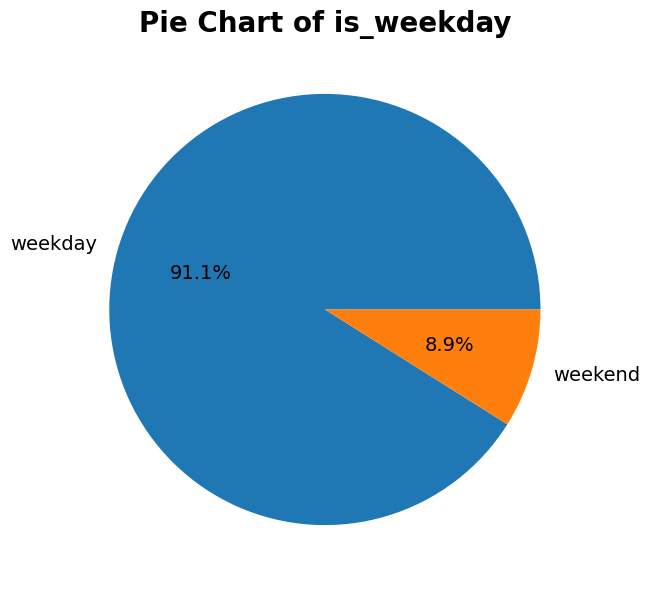

In [10]:
plot.plot_pie(merged_completed, 'is_weekday', labels=['weekend', 'weekday'])

In [51]:
print("Weekends are under-represented: 8.9% is less than 2/7= {:.2f}%".format(2/7*100))

Weekends are under-represented: 8.9% is less than 2/7= 28.57%


We have no data on incomplete orders dates to compare

## 2. Is it Holiday?

In [11]:
import holidays

In [13]:
print("our data spans {} - {}".format(merged_completed['trip_start_time'].min().year, merged_completed['trip_start_time'].max().year))

our data spans 2021 - 2022


In [14]:
ng_holidays = holidays.Nigeria(years=[2021, 2022])

In [38]:
ng_holidays

{datetime.date(2021, 1, 1): "New Year's day", datetime.date(2021, 4, 2): 'Good Friday', datetime.date(2021, 4, 5): 'Easter Monday', datetime.date(2021, 5, 1): "Workers' day", datetime.date(2021, 5, 13): 'Eid al-Fitr', datetime.date(2021, 5, 14): 'Eid al-Fitr Holiday', datetime.date(2021, 7, 20): 'Eid al-Adha', datetime.date(2021, 7, 21): 'Eid al-Adha Holiday', datetime.date(2021, 10, 1): 'National day', datetime.date(2021, 12, 25): 'Christmas day', datetime.date(2021, 12, 26): 'Boxing day', datetime.date(2021, 6, 12): 'Democracy day', datetime.date(2021, 6, 14): 'Democracy day (Observed)', datetime.date(2022, 1, 1): "New Year's day", datetime.date(2022, 4, 15): 'Good Friday', datetime.date(2022, 4, 18): 'Easter Monday', datetime.date(2022, 5, 1): "Workers' day", datetime.date(2022, 5, 2): 'Eid al-Fitr', datetime.date(2022, 5, 3): 'Eid al-Fitr Holiday', datetime.date(2022, 7, 9): 'Eid al-Adha', datetime.date(2022, 7, 10): 'Eid al-Adha Holiday', datetime.date(2022, 10, 1): 'National day'

In [15]:
s_holidays = merged_completed['trip_start_time'].apply(lambda x: x.date() in ng_holidays)

In [16]:
s_holidays.value_counts()

False    717114
Name: trip_start_time, dtype: int64

All the dates we have are in NOT holidays. Unfortunately we have no date data on incomplete orders

## 3. rain or no-rain?

Download the relevant weather data form https://www.visualcrossing.com/resources/documentation/weather-data/weather-data-documentation/

In [17]:
weather = pd.read_csv('https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/retrievebulkdataset?&key=KVCHBDG28B3MSG3DWAU4PG7N9&taskId=22948ddcd960d81d9a76ab7e071989df&zip=false')

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              242 non-null    object 
 1   datetime          242 non-null    object 
 2   tempmax           242 non-null    float64
 3   tempmin           242 non-null    float64
 4   temp              242 non-null    float64
 5   feelslikemax      242 non-null    float64
 6   feelslikemin      242 non-null    float64
 7   feelslike         242 non-null    float64
 8   dew               242 non-null    float64
 9   humidity          242 non-null    float64
 10  precip            242 non-null    float64
 11  precipprob        242 non-null    int64  
 12  precipcover       242 non-null    float64
 13  preciptype        126 non-null    object 
 14  snow              241 non-null    float64
 15  snowdepth         241 non-null    float64
 16  windgust          232 non-null    float64
 1

In [18]:
# rain amount

weather.precip.describe()

count    242.000000
mean       4.261157
std       13.961054
min        0.000000
25%        0.000000
50%        0.000000
75%        1.900000
max      126.000000
Name: precip, dtype: float64

In [19]:
# we add a column that specifies if there is rain or not

light_rain = 2.0

weather['is_raining'] = weather['precip'].apply(lambda x: 1 if x> light_rain else 0)

weather['is_raining'].value_counts()

0    191
1     51
Name: is_raining, dtype: int64

In [20]:
# We only need the columns of is_raining and date

weather = weather[['datetime', 'is_raining']]

In [21]:
rain_df =pd.DataFrame()

rain_df['trip_start_time'] = merged_completed['trip_start_time']
rain_df['date'] = merged_completed['trip_start_time'].apply(lambda x: str(x.date()))

In [22]:
# we merge the two dataframes on date

merge = pd.merge(rain_df, weather, how= 'left', left_on='date', right_on='datetime')

In [23]:
# We define two columns rain and no_rain

merged_completed['rain'] = merge['is_raining']
merged_completed['no_rain'] = 1 - merge['is_raining']

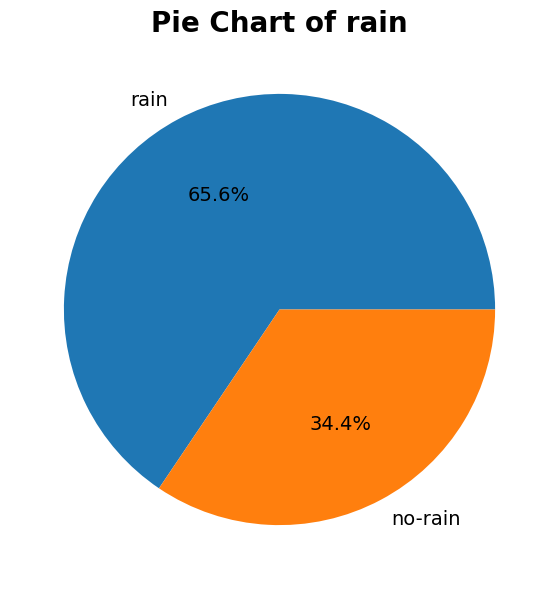

In [25]:
plot.plot_pie(merged_completed, 'rain', labels=['rain', 'no-rain'])

# Write the data

In [26]:
merged_completed.to_csv("../data/new_features.csv", index=False)